# Heart Disease Classification
The original data came from the [Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine Learning Repository.
Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).
The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.

The following are the features we'll use to predict our target variable (heart disease or no heart disease).

| Feature  | Description | Example Values |
|:-----|:-----|:------|
| **age** | Age in years | 29, 45, 60 |
| **sex** | 1 = male; 0 = female | 0, 1  |
| **cp**  | Chest pain type | 0: Typical angina (chest pain), 1: Atypical angina (chest pain not related to heart), 2: Non-anginal pain (typically esophageal spasms (non heart related), 3: Asymptomatic (chest pain not showing signs of disease) |
| **trestbps** | Resting blood pressure (in mm Hg on admission to the hospital)  | 120, 140, 150 |
| **chol** | Serum cholesterol in mg/dl | 180, 220, 250 |
| **fbs** | Fasting blood sugar > 120 mg/dl (1 = true; 0 = false) | 0, 1 |
| **restecg** | Resting electrocardiographic results | 0: Nothing to note, 1: ST-T Wave abnormality, 2: Left ventricular hypertrophy  |
| **thalach** | Maximum heart rate achieved | 160, 180, 190 |
| **exang**  | Exercise induced angina (1 = yes; 0 = no) | 0, 1 |
| **oldpeak**  | ST depression (heart potentially not getting enough oxygen) induced by exercise relative to rest | 0.5, 1.0, 2.0  |
| **slope** | The slope of the peak exercise ST segment | 0: Upsloping, 1: Flatsloping, 2: Downsloping |
| **ca** | Number of major vessels (0-3) colored by fluoroscopy | 0, 1, 2, 3 |
| **thal** | Thalium stress result  | 1: Normal, 3: Normal, 6: Fixed defect, 7: Reversible defect |
| **target** | Have disease or not (1 = yes; 0 = no) | 0, 1 |

> **Note:** No personal identifiable information (PPI) can be found in the dataset.


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy, pandas as pd, seaborn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, ConfusionMatrixDisplay, RocCurveDisplay, auc
"""
The original data came from the [Cleveland database](https://archive.ics.uci.edu/dataset/45/heart+disease) from UCI Machine Learning Repository.
Howevever, we've downloaded it in a formatted way from [Kaggle](https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset).
The original database contains 76 attributes, but here only 14 attributes will be used. **Attributes** (also called **features**) are the variables what we'll use to predict our **target variable**.
"""
data = pd.read_csv("data/heart-disease.csv")
print(data.isna().sum())
data.head()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


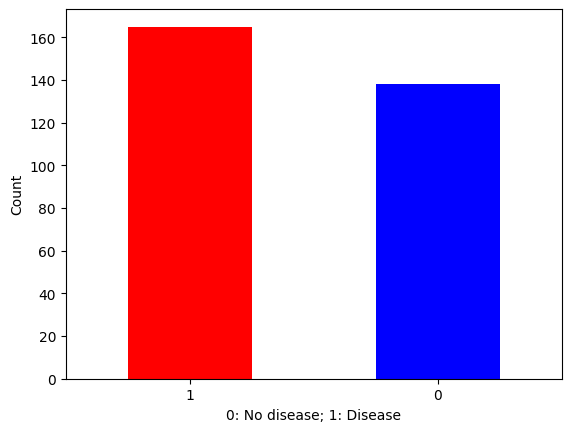

In [3]:
data["target"].value_counts().plot.bar(color=["red", "blue"]);
plt.xlabel("0: No disease; 1: Disease");
plt.ylabel("Count");
plt.xticks(rotation=0); # Make the xlabels vertical

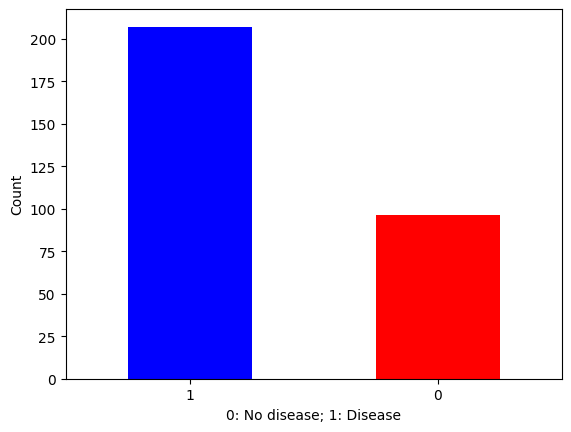

In [4]:
data["sex"].value_counts().plot.bar(color=["blue", "red"]);
plt.xlabel("0: No disease; 1: Disease")
plt.ylabel("Count");
plt.xticks(rotation=0); # Make the xlabels vertical

In [7]:
# Compare sex with target
pd.crosstab(data.target, data.sex)

sex,0,1
target,,
0,24,114
1,72,93


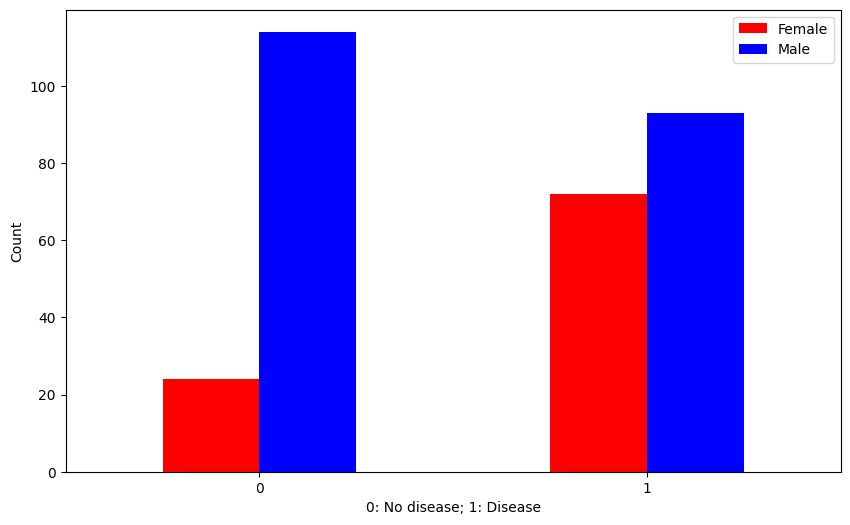

In [5]:
pd.crosstab(data.target, data.sex).plot.bar(figsize=(10, 6), color=["red", "blue"]);
plt.xlabel("0: No disease; 1: Disease")
plt.ylabel("Count");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0); # Make the xlabels vertical

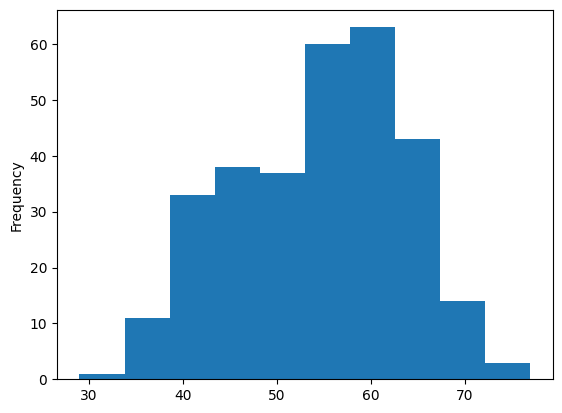

In [9]:
data["age"].plot.hist();

In [43]:
#age_sex = pd.DataFrame()
ages = numpy.sort(data["age"].unique())
type(ages)
males = []
females = []
for age in ages:
    males.append(len(data[(data['age'] == age) & (data['sex'] == 0) & (data['target'] == 1)]))
    females.append(len(data[(data['age'] == age) & (data['sex'] == 1) & (data['target'] == 1)]))
ages, len(ages), len(males),len(females)

(array([29, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 74, 76, 77]),
 41,
 41,
 41)

Text(0.5, 0.98, 'Heart Disease Analysis')

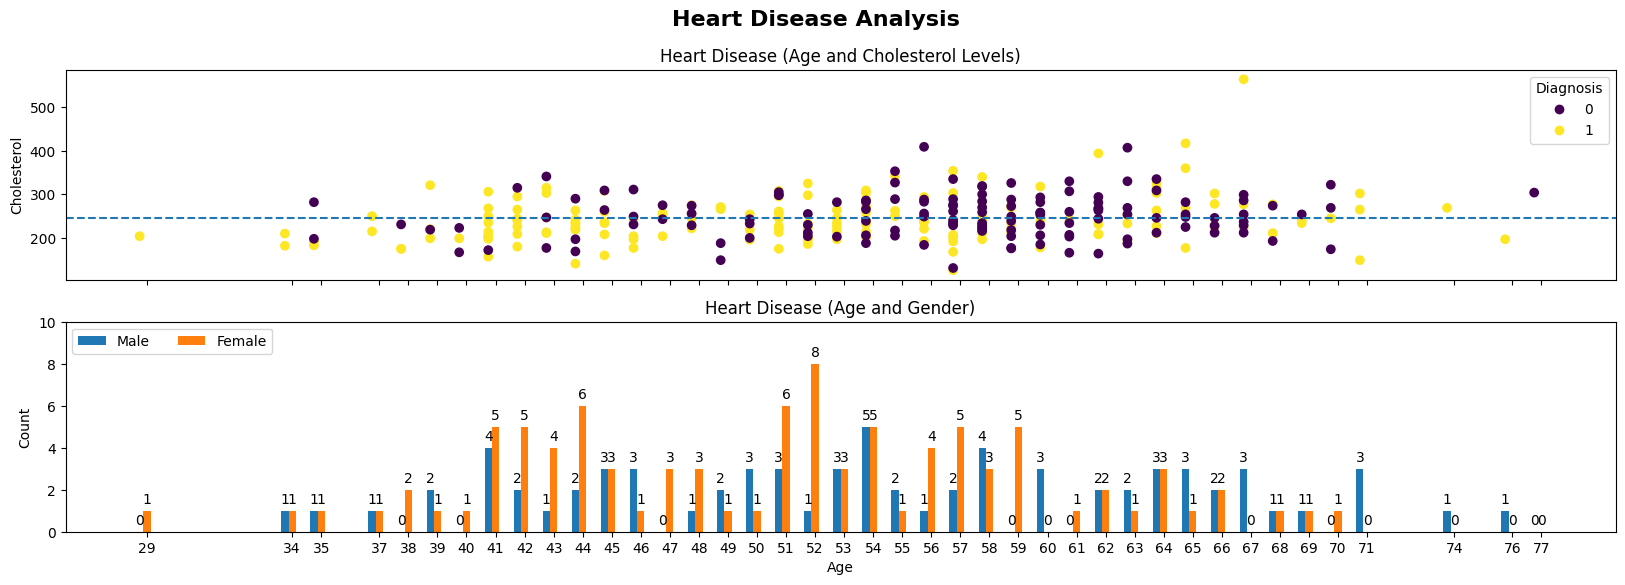

In [44]:
#data.plot(kind='scatter', x='age', y='chol', c='target')
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,6), sharex=True)

age_cholesterol = ax[0].scatter(x=data['age'], y=data['chol'], c=data['target'])
ax[0].set(title="Heart Disease (Age and Cholesterol Levels)", ylabel="Cholesterol")
ax[0].legend(*age_cholesterol.legend_elements(), title="Diagnosis") # legend_elements() will look for the c=data['target']
ax[0].axhline(data['chol'].mean(), linestyle="--")

genders = {
    'Male': males,
    'Female': females
}

x = ages #np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

for gender, count in genders.items():
    offset = width * multiplier
    rects = ax[1].bar(x + offset, count, width, label=gender)
    ax[1].bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax[1].set(title='Heart Disease (Age and Gender)', xlabel="Age", ylabel="Count")
ax[1].set_xticks(x + width, ages)
ax[1].legend(loc='upper left', ncols=3)
ax[1].set_ylim(0, 10)

fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold")
#fig.savefig("~/Downloads/HeartDiseaseAnalysis.png")

In [12]:
def CorrelationMatrixHeatMap(df : pd.DataFrame):
    matrix = df.corr()
    plt.subplots(figsize=(15,10))
    ax = seaborn.heatmap(matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu") # https://r02b.github.io/seaborn_palettes/
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5) # To avoid the truncation in y-axis

Correlation Matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trestbps  0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalach  -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exang     0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slope    -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
ca        0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thal      0.068001  0.210041 -0.161736  0.06

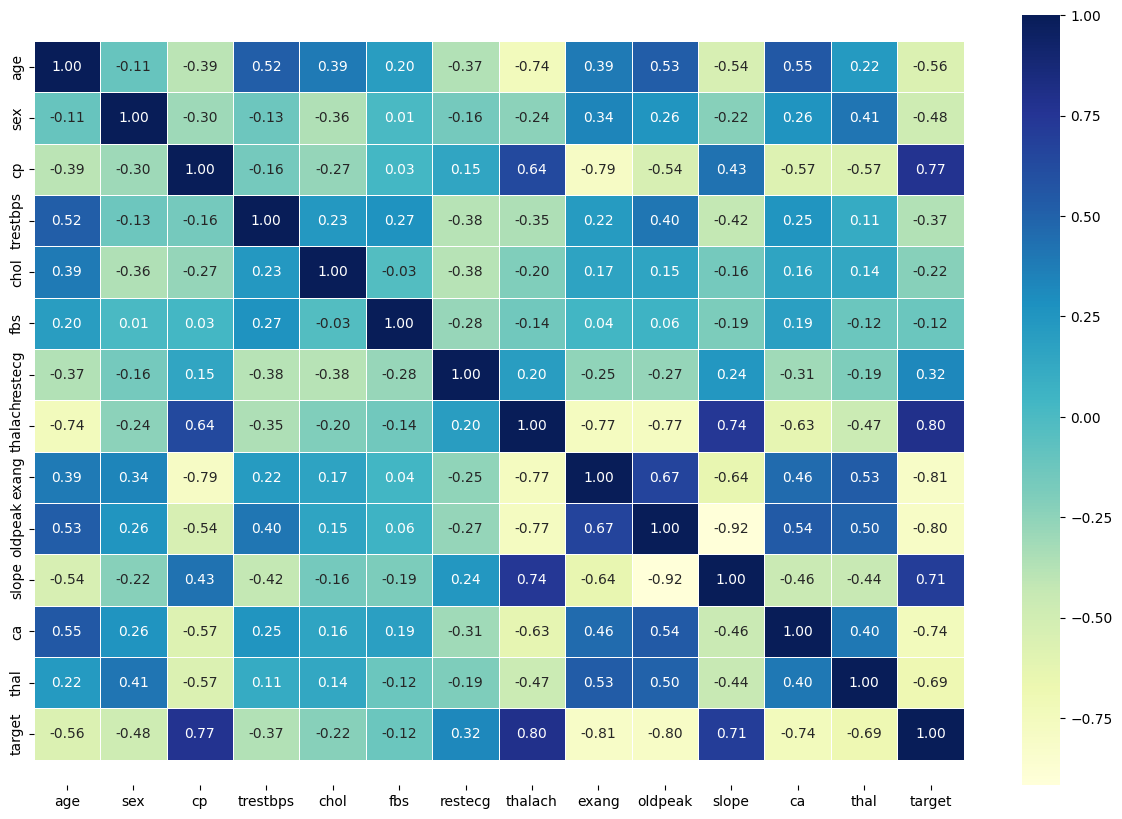

In [13]:
# Correlation Matrix
print("Correlation Matrix:")
correlation = data.corr()
print(correlation)
CorrelationMatrixHeatMap(correlation)

In [46]:
# Create X (features matrix)
X = data.drop("target", axis=1)

# Create Y (labels)
Y = data["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [47]:
# (2) Random forest - Randomizing the feature selection. Select from k < n features at each node. k is usually sqrt(n). Works better for large feature set.
model = RandomForestClassifier(n_jobs=-1) # Can fine tune n_estimators hyper-parameter. n_jobs defaults to None which means 1
print(model.get_params())
model.fit(X_train, Y_train)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Classification model evaluation metrics:

1. Accuracy

2. Area under ROC (Receiver Operating Characteristics) curve - binary classification models.

    - Comparison of a model's true-positive rate to false-positive rate at different classification thresholds.

    - The AUC metric tells you how well your model is at choosing between classes (for example, how well it is at deciding whether someone has heart disease or not). A perfect model will get an AUC score of 1.

3. Confusion matrix

4. Classification Report

In [48]:
def plot_roc_curve(tpr, fpr):
    """
    Plot an ROC curve given the true-positive and false-positive rates of a model
    """
    # Plot ROC curve
    plt.plot(fpr, tpr, color="red", label="ROC")
    # Plot a line with no predictive power (baseline)
    plt.plot([0, 1], [0, 1], color="blue", linestyle="--", label="Guessing")
    # Customize the plot
    plt.xlabel("False-Positive Rate (fpr)")
    plt.ylabel("True-Positive Rate (tpr)")
    plt.title("Receiver Operating Characteristics (ROC) curve")
    plt.legend()
    plt.show()

def ConfusionMatrix(truths, predictions, title):
    """
    Show confusion matrix using:
    (1) Pandas' crosstab
    (2) Seaborn heatmap
    """
    assert truths.shape[0] == 1
    assert predictions.shape[0] == 1
    print("Confusion Matrix:")
    matrix = pd.crosstab(truths, predictions, rownames=["Truths"], colnames=["Predictions"])
    print(matrix)
    ax = seaborn.heatmap(matrix, annot=True)
    ax.set_title(title)
    plt.show()

Accuracy: 0.8360655737704918
AUC Score: 0.884065934065934


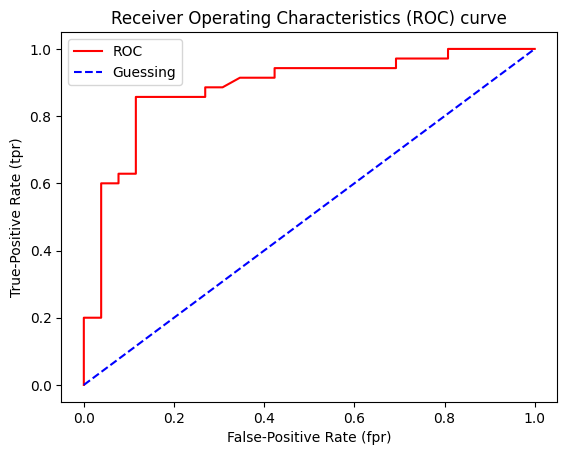

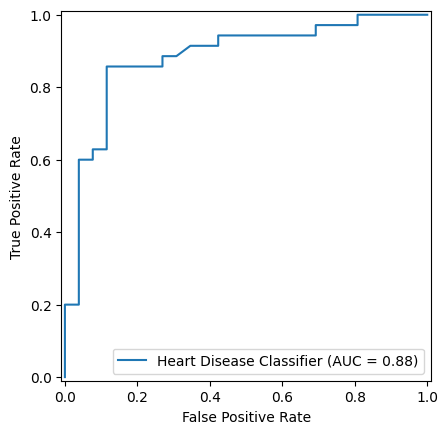

Confusion matrix:
[[21  5]
 [ 5 30]]
Confusion Matrix:
Predictions   0   1
Truths             
0            21   5
1             5  30


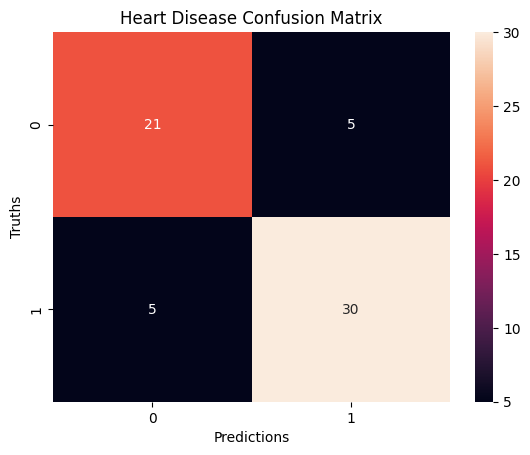

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.86      0.86      0.86        35

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
# https://scikit-learn.org/stable/modules/model_evaluation.html
"""
Estimator score method: Estimators have a score method providing a default evaluation criterion for the problem they are designed to solve. Most commonly this is accuracy for classifiers and the coefficient of determination (R^2) for regressors. Details for each estimator can be found in its documentation.
"""
predictions = model.predict(X_test)

# 1. Accuracy
model.score(X_train, Y_train)
accuracy = model.score(X_test, Y_test)
print(f"Accuracy: {accuracy}")

# 2. ROC curve
# Make predictions with probabilities
y_probs = model.predict_proba(X_test) # predict the class probabilities. The returned estimates for all classes are ordered by the label of classes.
# y_probs[0]: Probabilities of class-0 (false)
# y_probs[1]: Probabilities of class-1 (true)
y_probs_positives = y_probs[:, 1]
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
fpr, tpr, thresholds = roc_curve(Y_test, y_probs_positives)
auc_score = roc_auc_score(Y_test, y_probs_positives)
print(f"AUC Score: {auc_score}") # 
plot_roc_curve(tpr, fpr)
roc_auc = auc(fpr, tpr)
rocCurveDisplay = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, name="Heart Disease Classifier")
rocCurveDisplay.plot()
plt.show()

# 3. Confusion Matrix
confusion = confusion_matrix(Y_test, predictions)
print("Confusion matrix:")
print(confusion)
ConfusionMatrix(Y_test.values.reshape([1, -1]), predictions.reshape([1,-1]), "Heart Disease Confusion Matrix")

# 4. Classification Report
report = classification_report(Y_test, predictions)
print("Classification Report:")
print(report)

In [ ]:
# The following demonstrates the importance of precision and recall metrics
disease_true = numpy.zeros(10000)
disease_true[0] = 1 # Only 1 positive case - Class imbalance

predictions = numpy.zeros(10000) # Model predicts every case as 0
report = classification_report(disease_true, predictions)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9999
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       1.00      1.00      1.00     10000



/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_divi

Cross-validation accuracy: 82.15%
Cross-validation precision: 0.8292047969467324
Cross-validation recall: 0.8606060606060606
Cross-validation F1: 0.8535622255025238


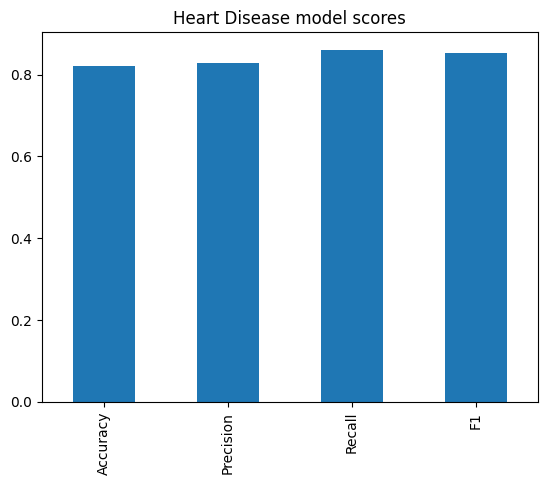

In [49]:
# Model evaluation using scoring parameter
from sklearn.model_selection import cross_val_score

cv_acc = cross_val_score(model, X, Y, cv=5, scoring=None) # scoring=None uses model's default scoring evaluation metric, i.e., accuracy for classification, R^2 for regression
cv_acc = numpy.mean(cv_acc)
print(f"Cross-validation accuracy: {cv_acc * 100:.2f}%")
cv_precision = cross_val_score(model, X, Y, cv=5, scoring="precision") # scoring=None uses model's default scoring evaluation metric, i.e., accuracy for classification, R^2 for regression
cv_precision = numpy.mean(cv_precision)
print(f"Cross-validation precision: {cv_precision}")
cv_recall = cross_val_score(model, X, Y, cv=5, scoring="recall") # scoring=None uses model's default scoring evaluation metric, i.e., accuracy for classification, R^2 for regression
cv_recall = numpy.mean(cv_recall)
print(f"Cross-validation recall: {cv_recall}")
cv_f1 = cross_val_score(model, X, Y, cv=5, scoring="f1") # scoring=None uses model's default scoring evaluation metric, i.e., accuracy for classification, R^2 for regression
cv_f1 = numpy.mean(cv_f1)
print(f"Cross-validation F1: {cv_f1}")

# Visualize the metrics
metrics = pd.DataFrame({
    "Accuracy": cv_acc,
    "Precision": cv_precision,
    "Recall": cv_recall,
    "F1": cv_f1
}, index=[0])
metrics.T.plot.bar(title="Heart Disease model scores", legend=False);

In [ ]:
# Model evaluation using Scikit-Learn functions
predictions = model.predict(X_test)
print(f"Accuracy score: {accuracy_score(Y_test, predictions) * 100:.2f}%")
print(f"Precision score: {precision_score(Y_test, predictions)}")
print(f"Recall score: {recall_score(Y_test, predictions)}")
print(f"F1 score: {f1_score(Y_test, predictions)}")

Accuracy score: 83.61%
Precision score: 0.7948717948717948
Recall score: 0.9393939393939394
F1 score: 0.8611111111111112


## Evaluate the following classification model types:

1. Logistic Regression

2. K-Nearest Neighbours

3. Random Forest Classifier

In [51]:
# Put the 3 classification model types in a dictionary
models = {
    "Logistic Regression": LogisticRegression(n_jobs=-1), # n_jobs defaults to None which means 1
    "kNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(n_jobs=-1) # n_jobs defaults to None which means 1
}
# Create a function to fit and score the models
def TrainAndEvaluate(models, X_train, X_test, Y_train, Y_test):
    """
    Train and evaluate the models.
    """
    scores = {}
    for name, model in models.items():
        model.fit(X_train, Y_train)
        scores[name] = model.score(X_test, Y_test)
    return scores

scores: {'Logistic Regression': 0.7868852459016393, 'kNN': 0.6065573770491803, 'Random Forest': 0.7540983606557377}


/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


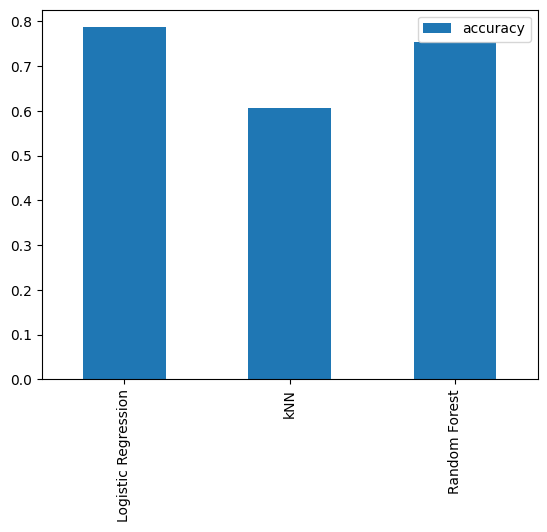

In [36]:
scores = TrainAndEvaluate(models, X_train, X_test, Y_train, Y_test)
print(f"scores: {scores}")
scores_pd = pd.DataFrame(scores, index=["accuracy"])
scores_pd.T.plot.bar();

Max test score: 72.13%


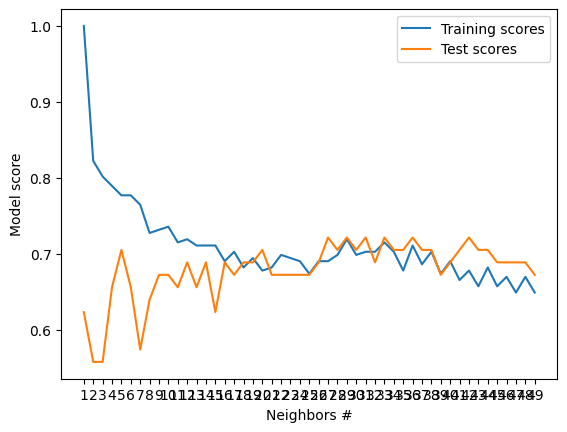

In [52]:
# Tune model hyperparameters
# Let's tune kNN since it has lower accuracy
# From documentation, we could adjsut n_neighbors
train_scores = []
test_scores = []
neighbors = range(1, 50)
knn = KNeighborsClassifier()
for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(X_train, Y_train)
    train_scores.append(knn.score(X_train, Y_train))
    test_scores.append(knn.score(X_test, Y_test))

plt.plot(neighbors, train_scores, label="Training scores")
plt.plot(neighbors, test_scores, label="Test scores")
plt.xlabel("Neighbors #")
plt.ylabel("Model score")
plt.legend()
plt.xticks(numpy.arange(1, 50, 1))
print(f"Max test score: {max(test_scores) * 100:.2f}%")

## Automatic hyperparameters tuning using `RandomizedSearchCV` and `GridSearchCV`

In [53]:
# Skip kNN since manual tuning doesn't improve much
# Tune using RandomizedSearchCV
# Tune LogisticRegression and RandomForestClassifier
logistic_params = {"C": numpy.logspace(-5, 5, 50), # 1e-5 to 1e5
                   "solver": ["liblinear"]}
forest_params = {"n_estimators": numpy.arange(10, 1000, 20),
                 "max_depth": [None, 7, 11, 13, 17, 19],
                 "min_samples_split": numpy.arange(1, 20, 2),
                 "min_samples_leaf": numpy.arange(1, 20, 2)}
print(f"Baseline model scores: {scores}")
print("=== LogisticRegression ===")
random_logistic_model = RandomizedSearchCV(LogisticRegression(n_jobs=-1), param_distributions=logistic_params, cv=5, n_iter=25,verbose=True)
random_logistic_model.fit(X_train, Y_train)
print(f"Best params : {random_logistic_model.best_params_}")
print(f"Score: {random_logistic_model.score(X_test, Y_test)}")

print("\n=== RandomForestClassifier ===")
random_forest_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1), param_distributions=forest_params, cv=5, n_iter=20,verbose=True)
random_forest_model.fit(X_train, Y_train)
print(f"Best params : {random_forest_model.best_params_}")
print(f"Score: {random_forest_model.score(X_test, Y_test)}")


Baseline model scores: {'Logistic Regression': 0.7868852459016393, 'kNN': 0.6065573770491803, 'Random Forest': 0.7540983606557377}
=== LogisticRegression ===
Fitting 5 folds for each of 25 candidates, totalling 125 fits


/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs'

Best params : {'solver': 'liblinear', 'C': np.float64(0.19306977288832497)}
Score: 0.8360655737704918

=== RandomForestClassifier ===
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params : {'n_estimators': np.int64(370), 'min_samples_split': np.int64(15), 'min_samples_leaf': np.int64(11), 'max_depth': None}
Score: 0.8524590163934426


In [54]:
# GridSearchCV is a brute-force technique which search through every single combination of the input parameters provided. 
# Use limited selection of params to limite resource and time taken for the search.
print(f"Baseline model scores: {scores}")
print("=== LogisticRegression ===")
grid_logistic_model = GridSearchCV(LogisticRegression(n_jobs=-1), param_grid=logistic_params, cv=5, verbose=True)
grid_logistic_model.fit(X_train, Y_train)
print(f"Best params : {grid_logistic_model.best_params_}")
print(f"Score: {grid_logistic_model.score(X_test, Y_test)}")

print("\n=== RandomForestClassifier ===")
forest_params = {"n_estimators": numpy.arange(10, 1000, 100),
                 "max_depth": [None]}
grid_forest_model = GridSearchCV(RandomForestClassifier(), param_grid=forest_params, cv=5, verbose=True)
grid_forest_model.fit(X_train, Y_train)
print(f"Best params : {grid_forest_model.best_params_}")
print(f"Score: {grid_forest_model.score(X_test, Y_test)}")


Baseline model scores: {'Logistic Regression': 0.7868852459016393, 'kNN': 0.6065573770491803, 'Random Forest': 0.7540983606557377}
=== LogisticRegression ===
Fitting 5 folds for each of 50 candidates, totalling 250 fits


/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(
/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs'

Best params : {'C': np.float64(0.19306977288832497), 'solver': 'liblinear'}
Score: 0.8360655737704918

=== RandomForestClassifier ===
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best params : {'max_depth': None, 'n_estimators': np.int64(810)}
Score: 0.8688524590163934


## Feature Importance
### Which feature(s) contribute most to the outcomes of the model and how?

In [71]:
def FeatureImportance(columns, metrics, n=25):
    df = pd.DataFrame({
        "Features": columns,
        "Metrics": metrics
    }).sort_values("Metrics", ascending=False, ignore_index=True).reset_index(drop=True)
    fig, ax = plt.subplots()
    ax.barh(df.Features[:n], df.Metrics[:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Metrics")
    ax.set_title("Feature Importance")
    ax.invert_yaxis()

/home/khteh/.local/share/virtualenvs/JupyterNotebooks-uVG1pv5y/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1305: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 16.
  warnings.warn(


features coefficients: {'age': np.float64(0.010606999198469342), 'sex': np.float64(-1.0424606988570273), 'cp': np.float64(0.7262090531615673), 'trestbps': np.float64(-0.019228927361338244), 'chol': np.float64(-0.0016380094201928687), 'fbs': np.float64(-0.1484560442643276), 'restecg': np.float64(0.47945679057947316), 'thalach': np.float64(0.030877393554596587), 'exang': np.float64(-0.6385748908852074), 'oldpeak': np.float64(-0.5611976656040216), 'slope': np.float64(0.4701728212964221), 'ca': np.float64(-0.645511583776371), 'thal': np.float64(-0.7741078793456436)}

sex - target:
target    0   1
sex            
0        24  72
1       114  93

cp - target:
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


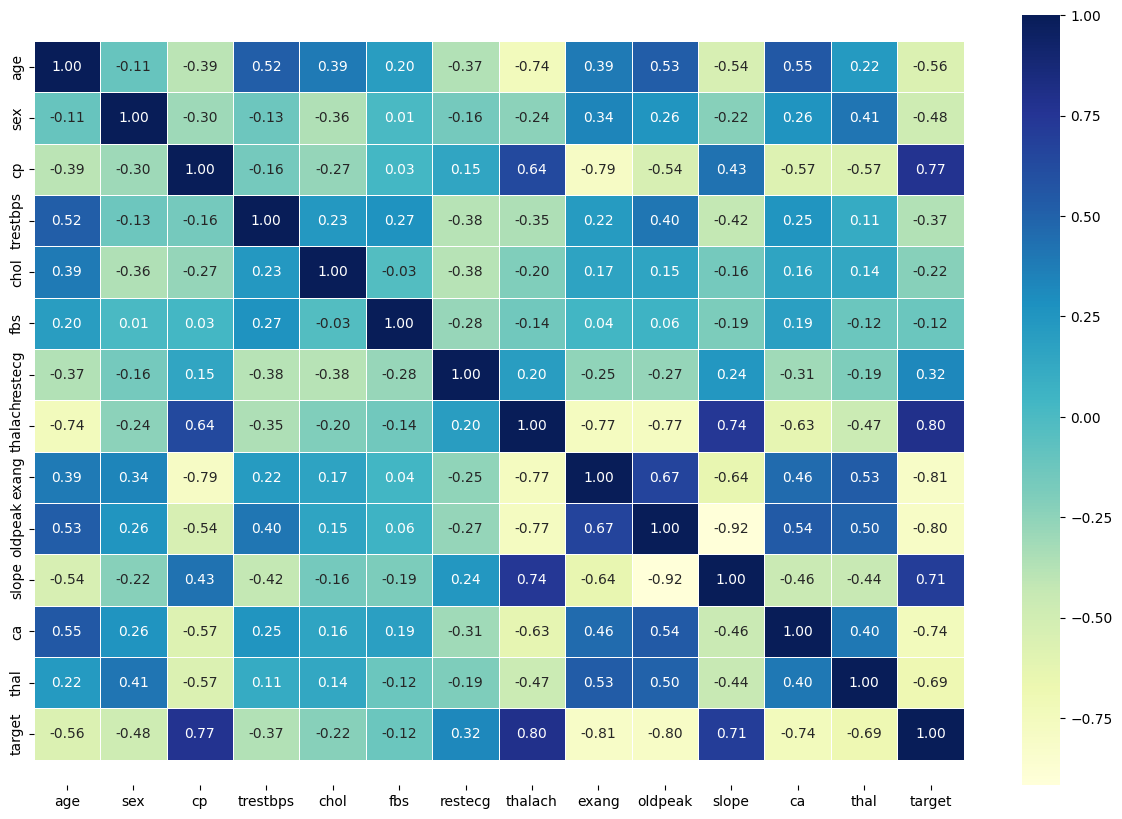

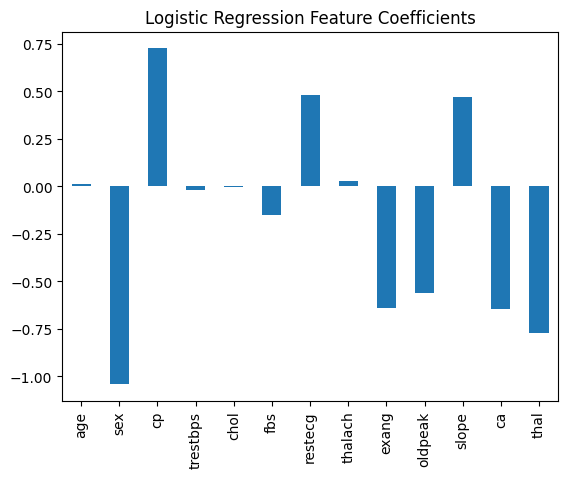

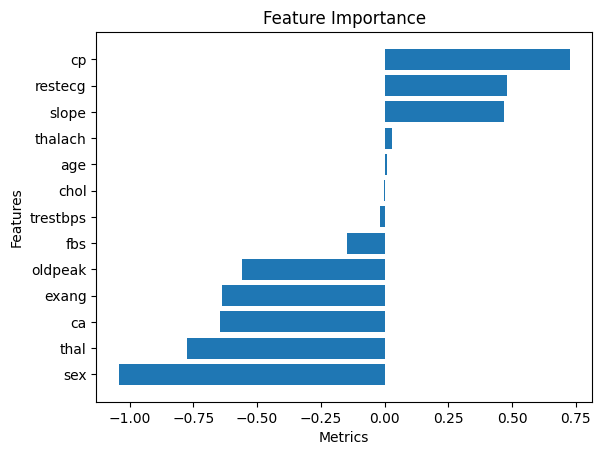

In [72]:
# Logistic Regression
model = LogisticRegression(C=0.30888435964774846, solver="liblinear", n_jobs=-1)
model.fit(X_train, Y_train)
model.coef_
features = dict(zip(data.columns, list(model.coef_[0])))
print(f"features coefficients: {features}")
CorrelationMatrixHeatMap(correlation)
features_df = pd.DataFrame(features, index=[0])
features_df.T.plot.bar(title="Logistic Regression Feature Coefficients", legend=False)
print("\nsex - target:")
print(pd.crosstab(data["sex"], data["target"])) # When sex transitions from 0 to 1 (value increases), data["target"].value_counts() decreases from 0 to 1 (moving in the opposite direction)
print("\ncp - target:")
print(pd.crosstab(data["cp"], data["target"])) # When cp transitions from 0 to 3 (value increases), data["target"].value_counts() increases from 0 to 1 (moving in the SAME direction)
FeatureImportance(X_train.columns, model.coef_[0])

feature_importances_: [0.07998259 0.0344848  0.12015419 0.07621603 0.07236775 0.01031622
 0.0235156  0.12035087 0.05941506 0.11062309 0.05432263 0.11801586
 0.1202353 ]
features coefficients: {'age': np.float64(0.07998258553112811), 'sex': np.float64(0.034484795235295254), 'cp': np.float64(0.12015419329441941), 'trestbps': np.float64(0.0762160314219402), 'chol': np.float64(0.07236774943407243), 'fbs': np.float64(0.010316219904727236), 'restecg': np.float64(0.023515597112800005), 'thalach': np.float64(0.12035086999791518), 'exang': np.float64(0.059415064232027165), 'oldpeak': np.float64(0.11062309431921381), 'slope': np.float64(0.05432263430668579), 'ca': np.float64(0.11801586443970362), 'thal': np.float64(0.12023530077007158)}

sex - target:
target    0   1
sex            
0        24  72
1       114  93

cp - target:
target    0   1
cp             
0       104  39
1         9  41
2        18  69
3         7  16


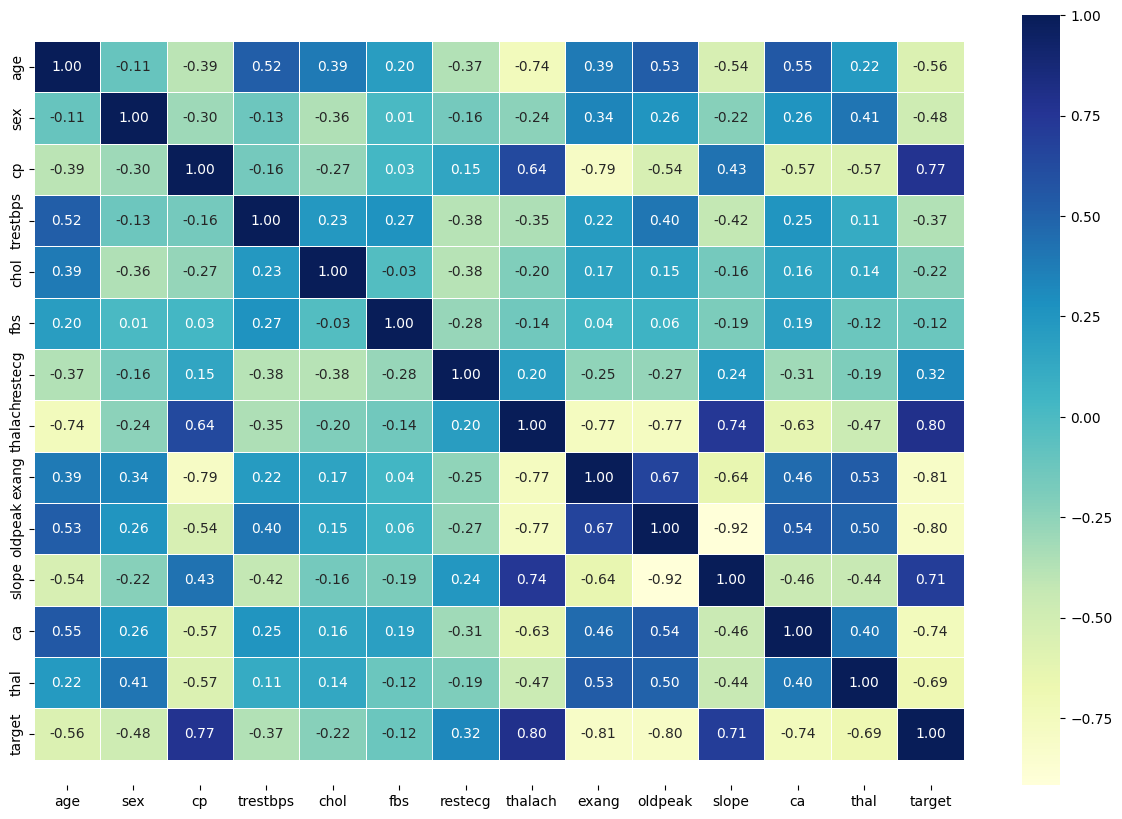

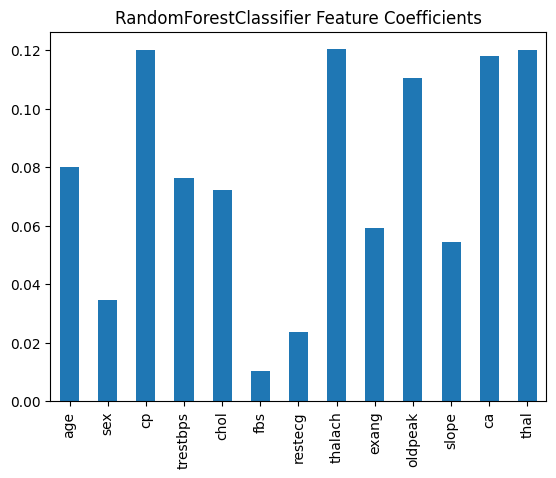

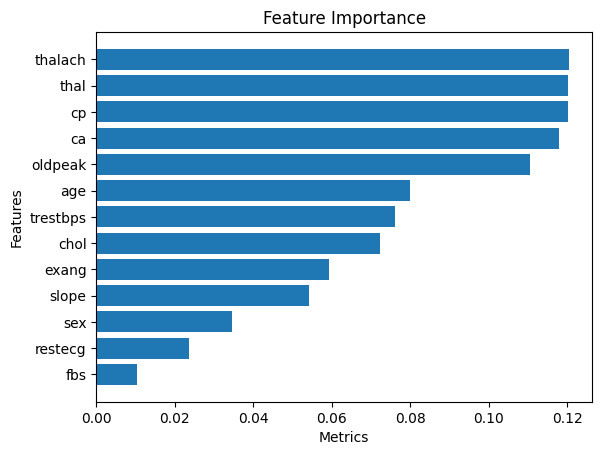

In [73]:
# RandomForestClassifier
model = RandomForestClassifier(max_depth=None, n_estimators=310, n_jobs=-1)
model.fit(X_train, Y_train)
model.feature_importances_
print(f"feature_importances_: {model.feature_importances_}")
features = dict(zip(data.columns, model.feature_importances_))
print(f"features coefficients: {features}")
CorrelationMatrixHeatMap(correlation)
features_df = pd.DataFrame(features, index=[0])
features_df.T.plot.bar(title="RandomForestClassifier Feature Coefficients", legend=False)
print("\nsex - target:")
print(pd.crosstab(data["sex"], data["target"])) # When sex transitions from 0 to 1 (value increases), data["target"].value_counts() decreases from 0 to 1 (moving in the opposite direction)
print("\ncp - target:")
print(pd.crosstab(data["cp"], data["target"])) # When cp transitions from 0 to 3 (value increases), data["target"].value_counts() increases from 0 to 1 (moving in the SAME direction)
FeatureImportance(X_train.columns, model.feature_importances_)